In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15,10)

In [2]:
df = pd.read_csv(Path(r"C:\EndtoEnd\housing_price\data\bengaluru_house_prices.csv"))

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [5]:
df.shape

(13320, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
df = df.drop(['society', 'society', 'balcony', 'availability'], axis=1)

# Data Cleaning handling NA values

In [8]:
df.head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
df.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df.shape

(13320, 6)

In [11]:
df = df.dropna()

In [12]:
df.shape

(13246, 6)

In [13]:
df.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

# Feature Engineering

- **adding a new feature for bhk** 

In [14]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df.head()

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00,2


In [15]:
df.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

- **exploring total_sqft feature**

In [16]:
def is_float(x):
    try:
        float(x)
        return True
    except:
        return False


In [17]:
df[~df['total_sqft'].apply(is_float)]

,area_type,location,size,total_sqft,bath,price,bhk
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...,...
12975,Super built-up Area,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Super built-up Area,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Super built-up Area,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Super built-up Area,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [18]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None
    

In [19]:
df.total_sqft = df.total_sqft.apply(convert_sqft_to_num)

In [20]:
df.shape

(13246, 7)

In [21]:
df = df[df.total_sqft.notnull()]

In [22]:
df.shape

(13200, 7)

In [23]:
df.loc[30]

area_type     Super built-up  Area
location                 Yelahanka
size                         4 BHK
total_sqft                  2475.0
bath                           4.0
price                        186.0
bhk                              4
Name: 30, dtype: object

# Feature Engineering

- Adding a new feature ***price_per_sqft***

In [24]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']
df.head()

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [25]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920759e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267701e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438331e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317073e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


- Exploring the categorical feature ***location***

In [26]:
df.location.value_counts().head(10)

location
Whitefield               532
Sarjapur  Road           392
Electronic City          302
Kanakpura Road           264
Thanisandra              232
Yelahanka                210
Uttarahalli              186
Hebbal                   176
Marathahalli             175
Raja Rajeshwari Nagar    171
Name: count, dtype: int64

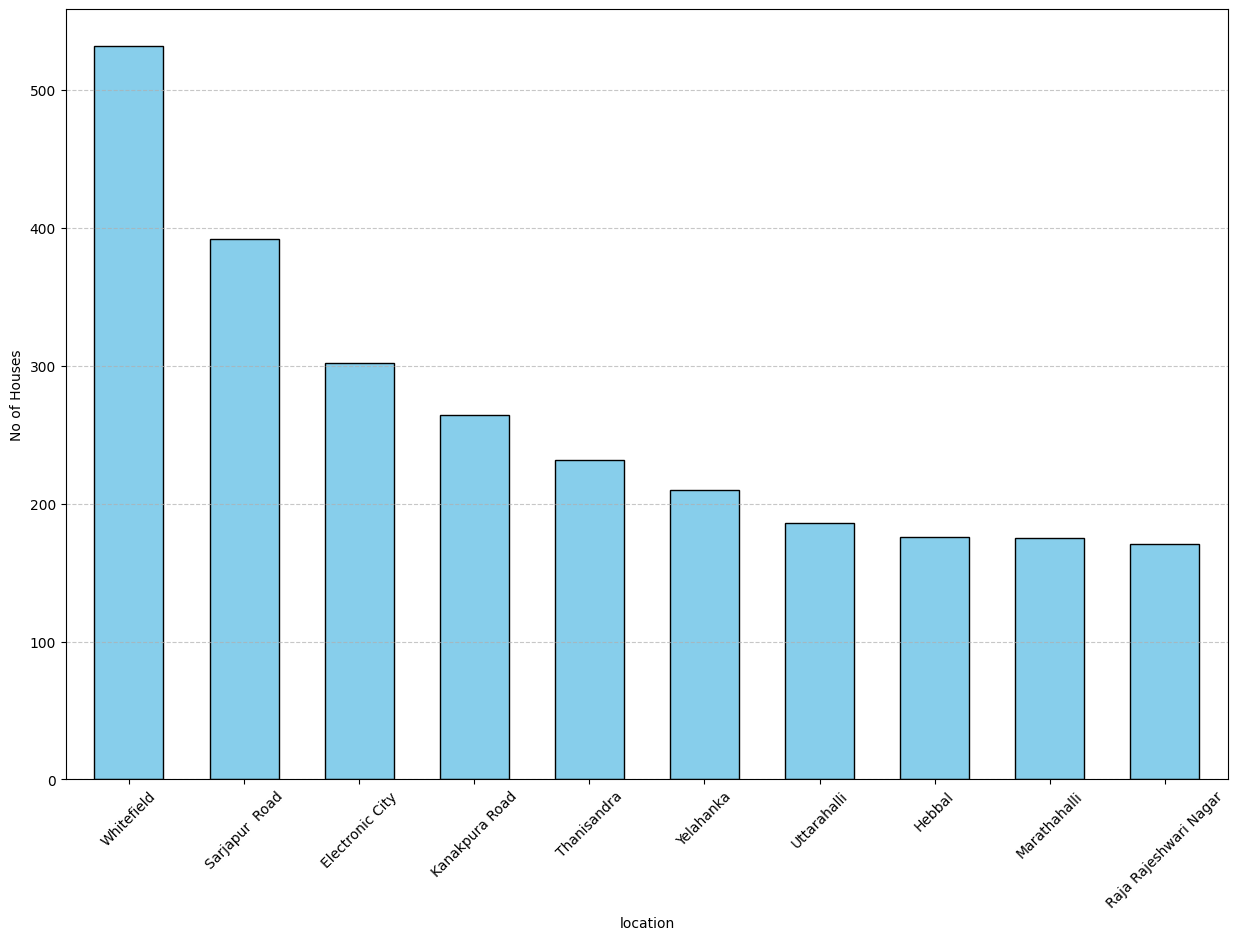

In [27]:
df.location.value_counts().head(10).plot(kind='bar', color='skyblue', edgecolor='black', width=0.6)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylabel("No of Houses")
plt.show()

- Most houses are from these 10 locations let's look at the bottom 10 locations next

In [28]:
df.location.value_counts()

location
Whitefield                   532
Sarjapur  Road               392
Electronic City              302
Kanakpura Road               264
Thanisandra                  232
                            ... 
Indiranagar HAL 2nd Stage      1
Maruthi HBCS Layout            1
K R C kothanur                 1
1Channasandra                  1
Abshot Layout                  1
Name: count, Length: 1298, dtype: int64

- Here we can see that there are some **location** datapoints of only one house. We can map these **location** datapoints to a new variable ***'Others'*** 
This will help us to reduce the no of categories. This is also called **Dimesionality reduction**.

In [29]:
locations_stats = df.location.value_counts()

In [30]:
len(locations_stats)

1298

In [31]:
len(locations_stats[locations_stats > 10])

240

In [32]:
len(locations_stats[locations_stats <= 10])

1058

# Dimensionality Reduction

In [33]:
locations_stats_below_10 = locations_stats[locations_stats <= 10]
locations_stats_below_10

location
Ganga Nagar                  10
Nagappa Reddy Layout         10
Naganathapura                10
Sadashiva Nagar              10
Basapura                     10
                             ..
Indiranagar HAL 2nd Stage     1
Maruthi HBCS Layout           1
K R C kothanur                1
1Channasandra                 1
Abshot Layout                 1
Name: count, Length: 1058, dtype: int64

In [34]:
df.location.nunique()

1298

In [35]:
df.location = df.location.apply(lambda x: 'other' if x in locations_stats_below_10 else x)

In [36]:
df.location.nunique()

241

- As we can see that the no. of unqiue entries in the **location** feature has changed and it has been brough down to **241** categories only.
- This step is very important and will help us when we do **OneHot Encoding** to the dataset 

In [37]:
df.head()

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [38]:
df.tail()

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
13315,Built-up Area,Whitefield,5 Bedroom,3453.0,4.0,231.0,5,6689.834926
13316,Super built-up Area,other,4 BHK,3600.0,5.0,400.0,4,11111.111111
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.0,2,5258.545136
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689.0,4.0,488.0,4,10407.336319
13319,Super built-up Area,Doddathoguru,1 BHK,550.0,1.0,17.0,1,3090.909091


# OUTLIER Removal 

- for a **2BHK** house the average size of the apartment should be atleast ***600 sqft*** so anything below that is very suspicious and we will treat those values as **outliers** because let's say ***---there is a datapoint that shows a 2BHK house with 300-400 sqft*** , it is not possible therfore we should treat them as **outliers**.

In [39]:
df[(df.total_sqft/df.bhk) < 300]

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,Plot Area,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,Plot Area,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Plot Area,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Plot Area,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Plot Area,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...,...
13277,Plot Area,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,Plot Area,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Plot Area,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Plot Area,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


- as we can see that there are some datapoints that shows **8 Bhk** apartments with ***total_sqft of only 600** which is totally wrong and these datapoints must be **removed**. So, we will remove these **744** rows from our dataframe.

In [40]:
df.shape

(13200, 8)

In [41]:
df = df[~((df.total_sqft/df.bhk) < 300)]

In [42]:
df.head()

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [43]:
df.shape

(12456, 8)

In [44]:
13200-744 

12456

# OUTLIER Removal using STD & Mean

In [45]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12456.000000,12456.000000,12456.000000,12456.000000,12456.000000
mean,1590.189927,2.562781,111.187960,2.649004,6308.502826
std,1260.404795,1.080275,152.203367,0.976046,4168.127339
min,300.000000,1.000000,9.000000,1.000000,267.829813
25%,1115.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


- here we can see that the **price** and **price_per_sqft** feature which is derived from price itself has a lot of **variation** therefore we will study this feature and try to remove any outliers pressent.

In [46]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [47]:
df = remove_pps_outliers(df)

In [48]:
df.shape

(10245, 8)

# Outliers removal using **bath** feature

In [49]:
df.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

- For **bathroom** we can say that if a house has more than **2 Bathrooms** than the **bhk** of the house it is an outlier. Because it is highly unlikely that there are more bathrooms in a house than bedrooms.

In [50]:
df.bath.value_counts()

bath
2.0     5930
3.0     2620
4.0      677
1.0      616
5.0      235
6.0      108
7.0       27
8.0       17
9.0       10
12.0       3
16.0       1
13.0       1
Name: count, dtype: int64

- lets check the bhk for the bathrooms above 7

In [51]:
df.loc[df.bath > 7]

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
49,Plot Area,2nd Stage Nagarbhavi,6 Bedroom,3000.0,8.0,451.0,6,15033.333333
50,Plot Area,2nd Stage Nagarbhavi,6 Bedroom,2400.0,8.0,450.0,6,18750.000000
306,Built-up Area,Abbigere,8 Bedroom,3000.0,8.0,150.0,8,5000.000000
1307,Built-up Area,Bommanahalli,8 Bedroom,3000.0,8.0,140.0,8,4666.666667
3022,Built-up Area,Hennur Road,8 Bedroom,5000.0,8.0,250.0,8,5000.000000
3239,Built-up Area,Horamavu Banaswadi,6 Bedroom,3800.0,8.0,200.0,6,5263.157895
3511,Plot Area,Indira Nagar,8 Bedroom,3250.0,8.0,600.0,8,18461.538462
3769,Built-up Area,KR Puram,9 BHK,4600.0,9.0,200.0,9,4347.826087
5107,Super built-up Area,Mico Layout,9 BHK,5000.0,9.0,210.0,9,4200.000000
5232,Built-up Area,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429


- from above we can see that there is datapoint ***at row no. 5232*** the house is only ***4 bhk*** that shows ***8 bath***  which is a data error but let's find a better way to deal with these kind of data errors.

In [52]:
df[df.bath > df.bhk +2]

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
1637,Built-up Area,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5232,Built-up Area,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6702,Super built-up Area,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8402,Super built-up Area,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [53]:
df = df[df.bath < df.bhk + 2]

In [54]:
df.shape

(10151, 8)

# Outliers removal using ***location*** and ***bhk*** feature

In [55]:
def plot_scatter(df, location):
    bhk2  = df[(df.location == location) & (df.bhk==2)]
    bhk3  = df[(df.location == location) & (df.bhk==3)]
    plt.scatter(bhk2.total_sqft ,bhk2.price,label= '2Bhk', c='g', s=50)
    plt.scatter(bhk3.total_sqft ,bhk3.price,label= '3Bhk', c='b', marker='+', s=50)
    plt.xlabel('Total sqft of house')
    plt.ylabel('Price of the house(lakhs INR)')
    plt.title(location)
    plt.legend()


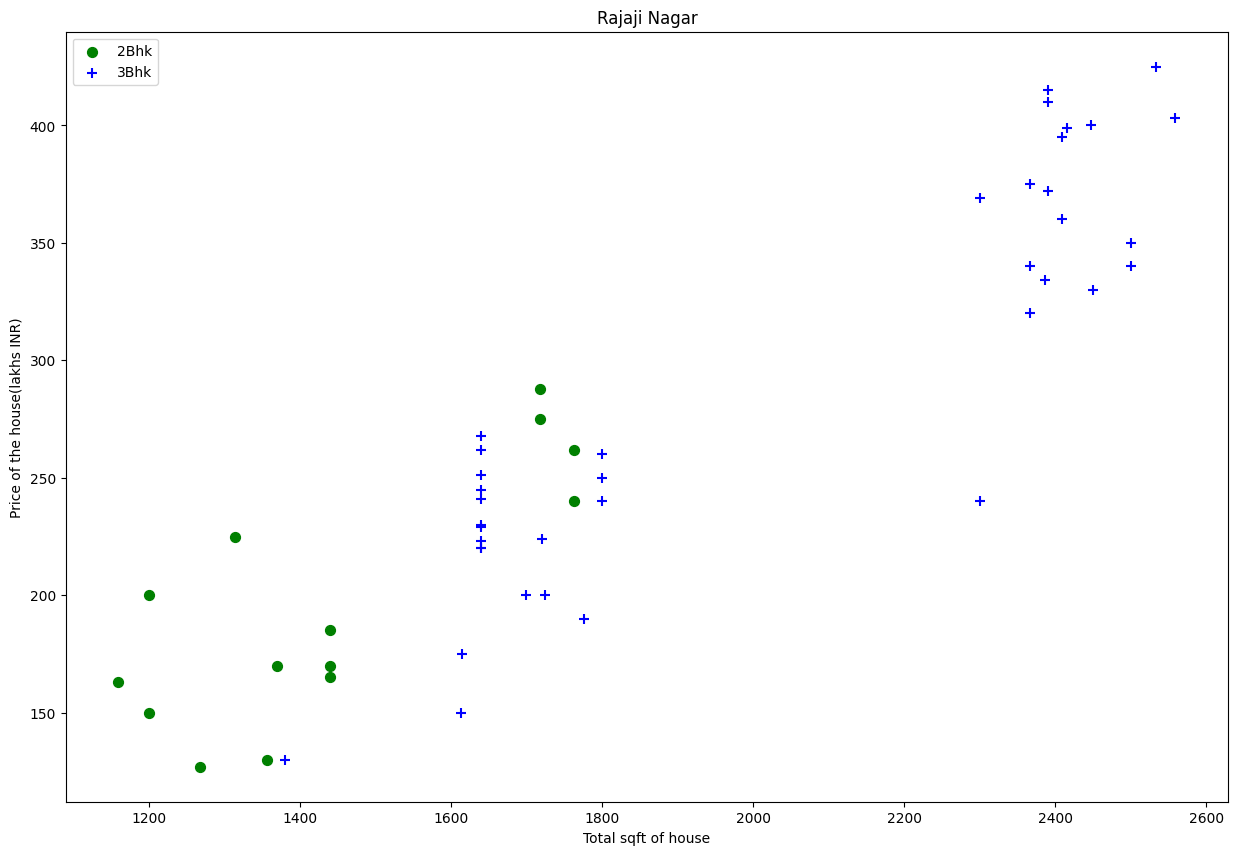

In [56]:
plot_scatter(df,"Rajaji Nagar")

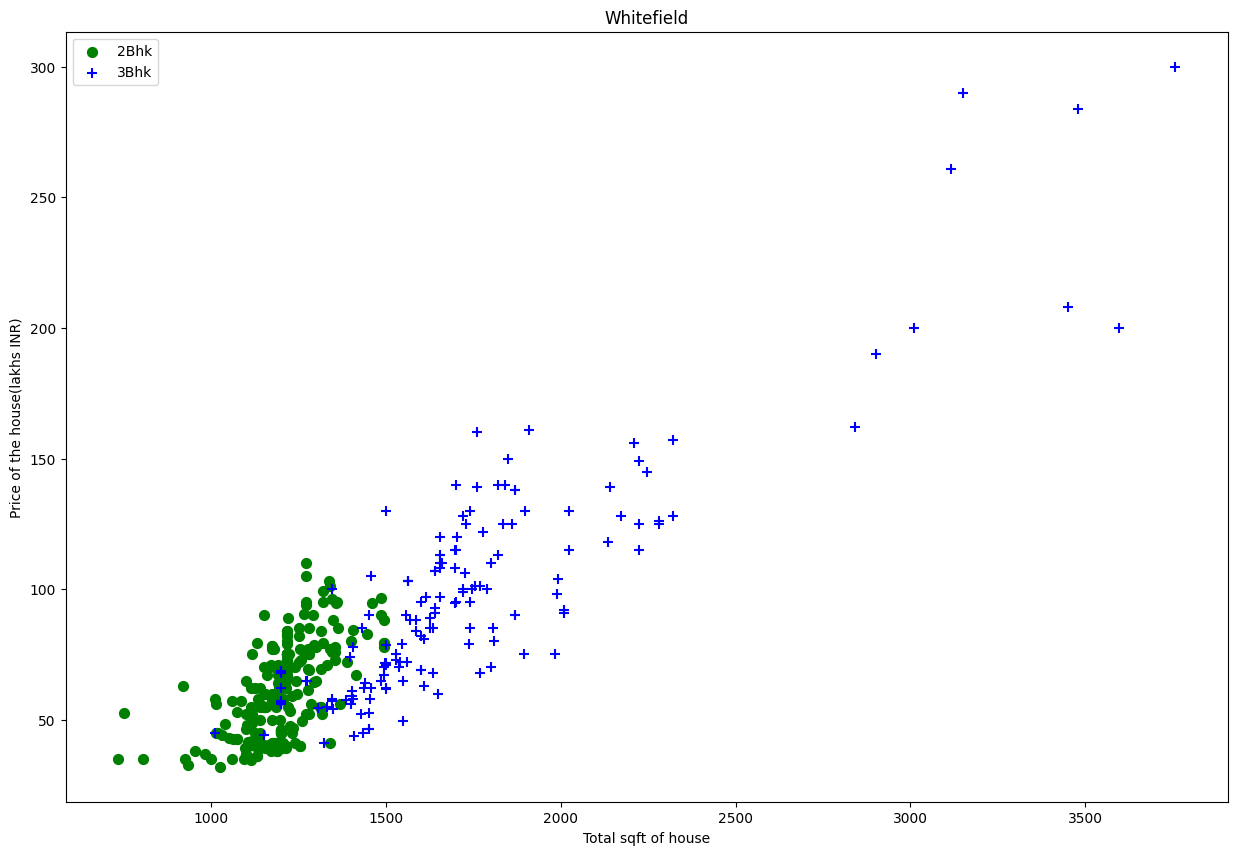

In [57]:
plot_scatter(df,"Whitefield")

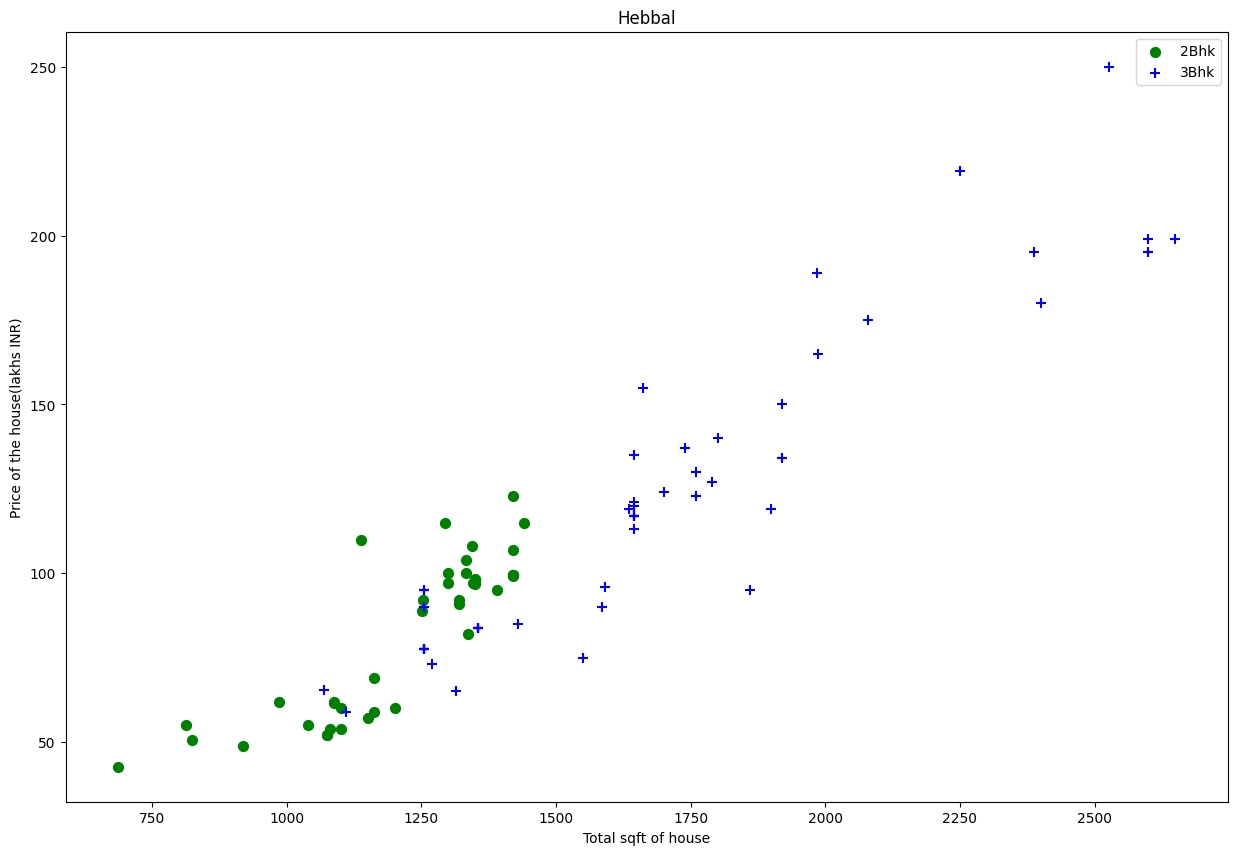

In [58]:
plot_scatter(df,"Hebbal")

- we can see that for there are some amount of mixing of ***price*** and ***total_sqft*** area with respect to each location category. What we can do in such situtation is, we can define **stats** for each location and if the house falls under the stats values we will keep it, if not we remove it. Why are we doing this ? - In a nutshell to make our model's job easier.

In [59]:
df = df.drop('area_type', axis=1)

In [60]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [61]:
df2 = remove_bhk_outliers(df)

In [62]:
df2.shape

(7255, 7)

- now let's re-check the scatter plot  

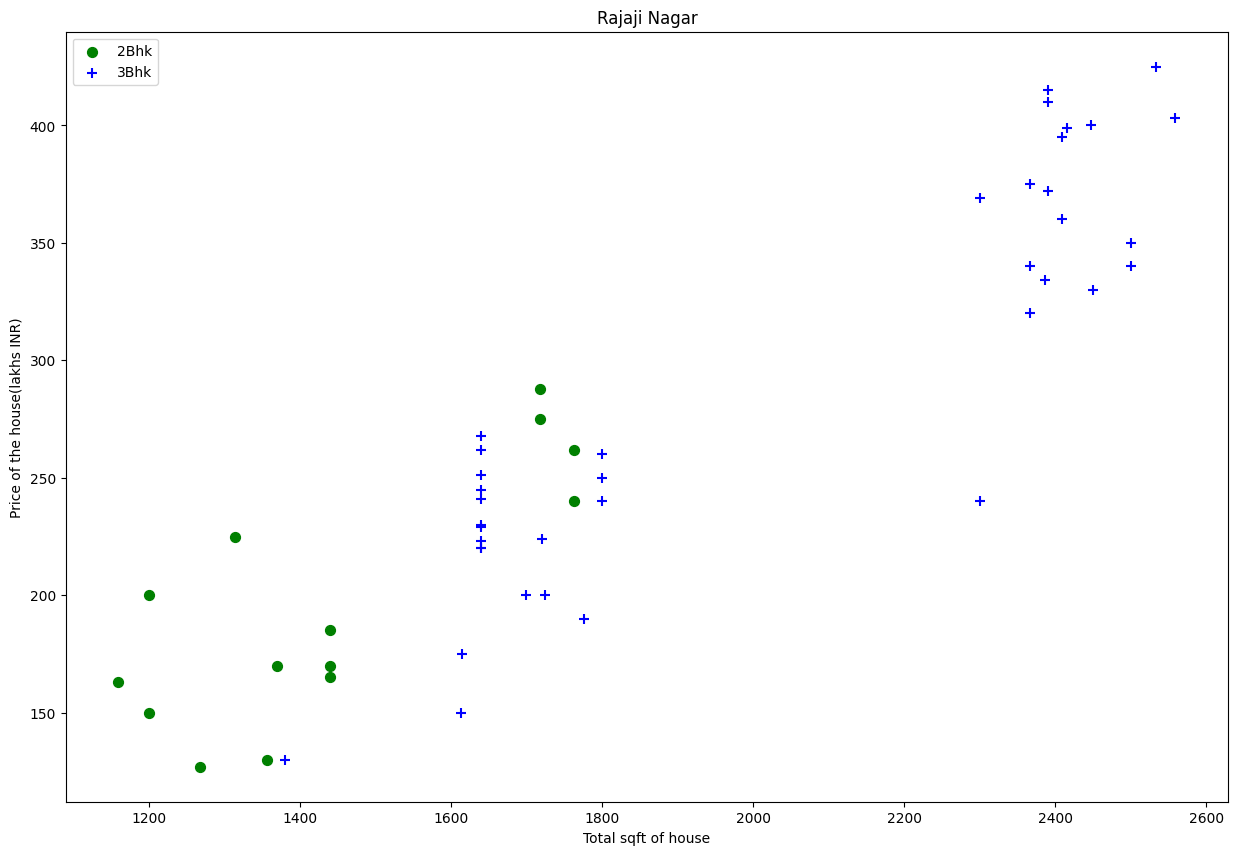

In [63]:
plot_scatter(df,"Rajaji Nagar")

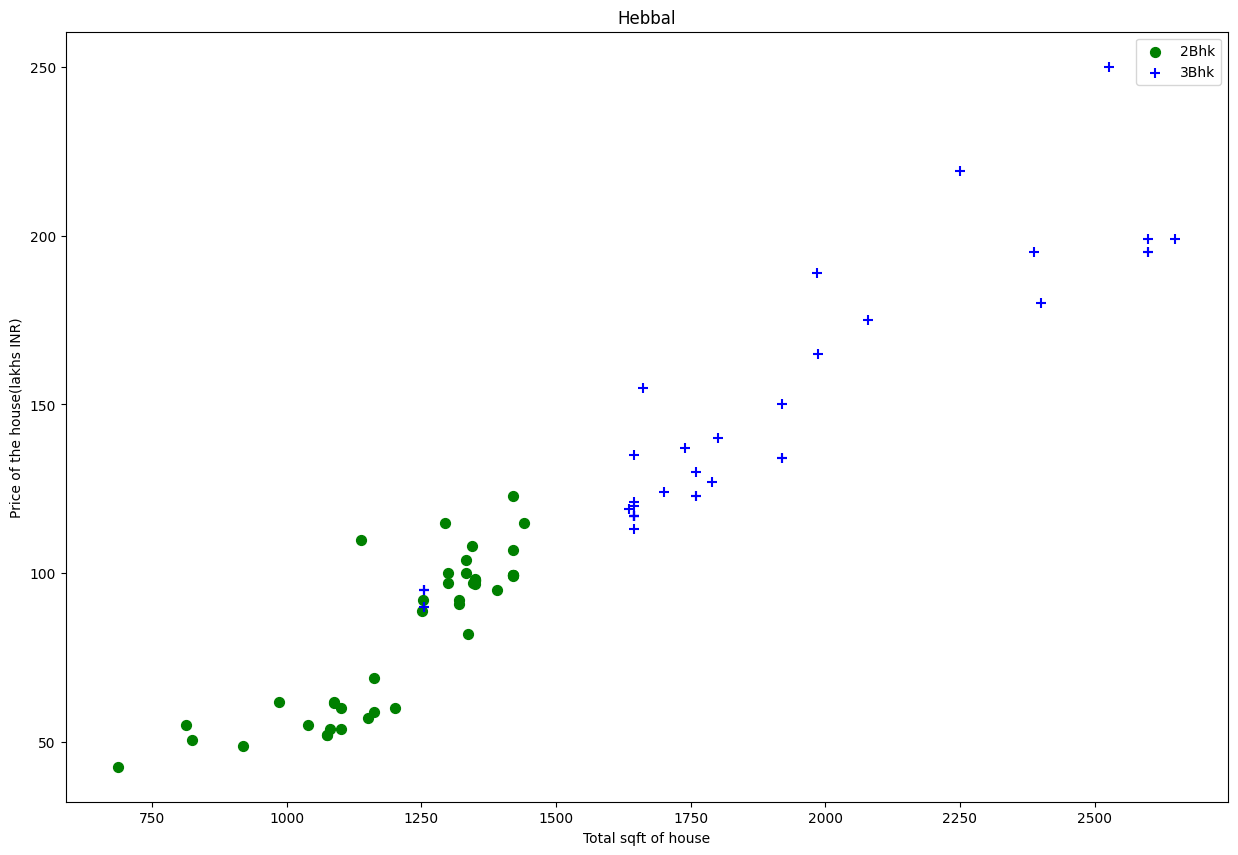

In [64]:
plot_scatter(df2,"Hebbal")

- **as we can see that there is a significant reduction in the mixing of values for location ***Hebbal*****
- here is a comparison chart side by side

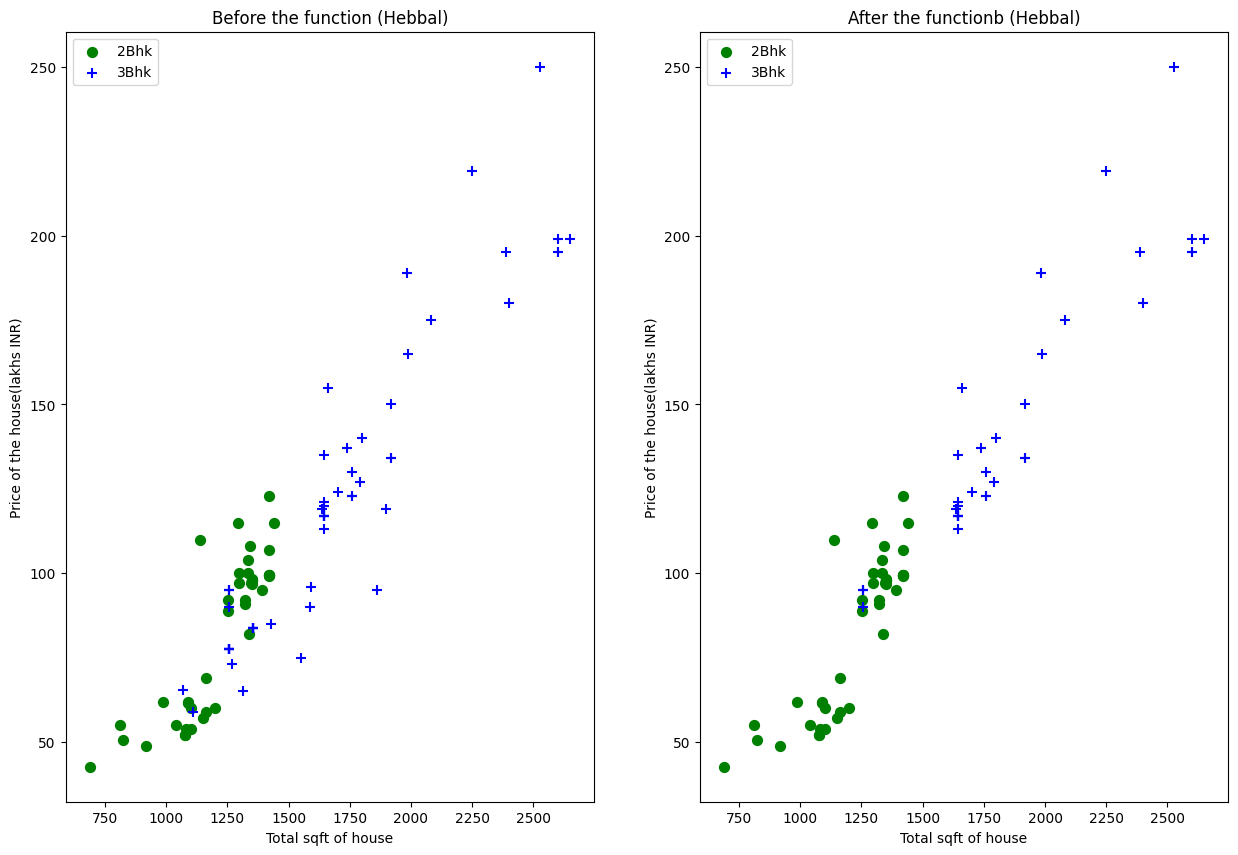

In [65]:
plt.subplot(1,2,1)
plot_scatter(df, "Hebbal")
plt.title("Before the function (Hebbal)")
plt.subplot(1,2,2)
plot_scatter(df2, "Hebbal")
plt.title("After the functionb (Hebbal)")
plt.show()

In [66]:
df2.shape

(7255, 7)

In [67]:
df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3,4561.403509
5,Devarachikkanahalli,2 BHK,947.0,2.0,43.0,2,4540.654699


In [68]:
df2.tail()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
10236,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10237,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10240,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10241,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443
10244,other,4 BHK,3600.0,5.0,400.0,4,11111.111111


# Using One Hot Encoding for the ***location*** feature

In [69]:
dummies = pd.get_dummies(df2.location)

In [70]:
dummies

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10237,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10240,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10241,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [71]:
df3 = pd.concat([df2, dummies.drop('other', axis='columns')], axis='columns')
df3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,3200.000000,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,6916.666667,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2,3418.803419,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3,4561.403509,True,False,False,...,False,False,False,False,False,False,False,False,False,False
5,Devarachikkanahalli,2 BHK,947.0,2.0,43.0,2,4540.654699,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [72]:
df3 = df3.drop('location', axis =1)

In [73]:
df3.shape

(7255, 246)

In [74]:
df3 = df3.drop(['price_per_sqft', 'size'], axis=1)

In [75]:
df3.shape

(7255, 244)

In [76]:
df3.head()

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1200.0,2.0,83.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1170.0,2.0,40.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1425.0,2.0,65.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,947.0,2.0,43.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


- Now our data is **clean** and processed to be fed into a **machine learning model**.

# Building the Model

In [77]:
df3.shape

(7255, 244)

In [78]:
X = df3.drop('price', axis = 1)
Y = df3['price']

In [79]:
X.head(2)

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1200.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [80]:
Y.head(2)

1    40.0
2    83.0
Name: price, dtype: float64

In [81]:
X.shape

(7255, 243)

In [82]:
Y.shape

(7255,)

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [84]:
X_train.shape

(5804, 243)

In [85]:
X_test.shape

(1451, 243)

In [86]:
y_train.shape

(5804,)

- **Trying out the Linear Regression model**

In [87]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [88]:
y_pred = lr.predict(X_test)

In [89]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [90]:
R2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [91]:
print(f"Mean Abs Error : {mae}")
print(f"Mean sq. Error : {mse}")
print(f"      R2 value : {R2 *100}%")

Mean Abs Error : 17.29463694318191
Mean sq. Error : 858.2785243519224
      R2 value : 88.04206979282365%


# Trying other models to find the best model

In [93]:
from sklearn.tree import DecisionTreeRegressor

- since it is very unlikely for these models to give good results in their base parameters. We will perfrom **hyperparameter training**.

In [94]:
from sklearn.model_selection import GridSearchCV

In [98]:
param_grid_tree = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],    
    'max_features': ['sqrt', 'log2'],
    'criterion': ['friedman_mse', 'absolute_error'],
    'splitter': ['best', 'random']
}
dt_grid = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator=dt_grid, param_grid=param_grid_tree, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [99]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'absolute_error'],
                         'max_depth': [None, 5, 10, 15],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [100]:
dt_pred = grid_search.predict(X_test)

In [101]:
R2 = r2_score(y_test, dt_pred)
mae = mean_absolute_error(y_test, dt_pred)
mse = mean_squared_error(y_test, dt_pred)

In [102]:
print(f"Mean Abs Error : {mae}")
print(f"Mean sq. Error : {mse}")
print(f"      R2 value : {R2 *100}%")

Mean Abs Error : 19.27976677675644
Mean sq. Error : 1385.0294773797066
      R2 value : 80.70313382489172%


- since ***Linear Reg.*** is giving better **R2 value** than ***Decision Tree*** we will go with Linear Reg. algorithm for our model.

In [104]:
model = lr

# Testing the model with some hypothetical values

In [105]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]

In [166]:
predict_price('1st Phase JP Nagar',1200, 2, 2)

C:\Users\gouta\.conda\envs\mlproj\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


105.12970965548276

In [168]:
df[(df.location == '1st Phase JP Nagar') & (df.bhk == 2) & (df.total_sqft >=1200) & (df.total_sqft <=1300) ]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
33,1st Phase JP Nagar,2 BHK,1200.0,2.0,86.0,2,7166.666667
37,1st Phase JP Nagar,2 BHK,1205.0,2.0,85.0,2,7053.941909


In [174]:
predict_price('1st Phase JP Nagar',1800, 3, 3)

C:\Users\gouta\.conda\envs\mlproj\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


155.64682695988725

In [175]:
df[(df.location == '1st Phase JP Nagar') & (df.bhk == 3) & (df.total_sqft >= 1800) ]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
21,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.666667
23,1st Phase JP Nagar,3 BHK,2065.0,4.0,210.0,3,10169.491525
24,1st Phase JP Nagar,3 BHK,2024.0,3.0,157.0,3,7756.916996
25,1st Phase JP Nagar,3 BHK,2059.0,3.0,225.0,3,10927.634774
31,1st Phase JP Nagar,3 BHK,2180.0,3.0,210.0,3,9633.027523
35,1st Phase JP Nagar,3 BHK,2077.0,3.0,175.0,3,8425.613866


- We can see that the model predicts the values with a good accuracy for some datapoints and not so good with some other data points. which is expected from a machine learning model.


# EXPORTING THE MODEL

In [171]:
import pickle

with open ("banglore-house-model", 'wb') as f:
    pickle.dump(model, f)

# Preserving column information

In [173]:
import json

columns = {
    'data_columns': [col.lower() for col in X.columns]
}

with open("columns.json", 'w') as f:
    json.dump(columns, f)


- **In this notebook we trained a model on the Banglore-housing dataset and the metrics we achieved were:**
- ***Mean Abs Error*** : **17.29463694318191**
- ***Mean sq. Error*** : **858.2785243519224**
- ***R2 value*** : **88.04206979282365%**